In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df=pd.read_csv("retail_sales_dataset.csv")

In [ ]:
print(df.head())

   Transaction ID        Date  ... Price per Unit Total Amount
0               1  2023-11-24  ...             50          150
1               2  2023-02-27  ...            500         1000
2               3  2023-01-13  ...             30           30
3               4  2023-05-21  ...            500          500
4               5  2023-05-06  ...             50          100

[5 rows x 9 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
print(df.describe)

<bound method NDFrame.describe of      Transaction ID       Date  ... Price per Unit Total Amount
0                 1 2023-11-24  ...             50          150
1                 2 2023-02-27  ...            500         1000
2                 3 2023-01-13  ...             30           30
3                 4 2023-05-21  ...            500          500
4                 5 2023-05-06  ...             50          100
..              ...        ...  ...            ...          ...
995             996 2023-05-16  ...             50           50
996             997 2023-11-17  ...             30           90
997             998 2023-10-29  ...             25          100
998             999 2023-12-05  ...             50          150
999            1000 2023-04-12  ...             30          120

[1000 rows x 9 columns]>


In [ ]:
print(df["Date"].min(),"to",df["Date"].max())


2023-01-01 00:00:00 to 2024-01-01 00:00:00


Daily sales Total aggregration

```
# This is formatted as code
```



In [ ]:
daily_sales=df.groupby("Date")["Total Amount"].sum().reset_index()
df_prophet=daily_sales.rename(columns={"Date":"ds","Total Amount":"y"})
print(df_prophet.head())

          ds     y
0 2023-01-01  3600
1 2023-01-02  1765
2 2023-01-03   600
3 2023-01-04  1240
4 2023-01-05  1100


In [ ]:
model=Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_faa2biv/n1mnirp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_faa2biv/2i6esocr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93041', 'data', 'file=/tmp/tmp_faa2biv/n1mnirp1.json', 'init=/tmp/tmp_faa2biv/2i6esocr.json', 'output', 'file=/tmp/tmp_faa2biv/prophet_model3ku_tvyb/prophet_model-20250715151533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)

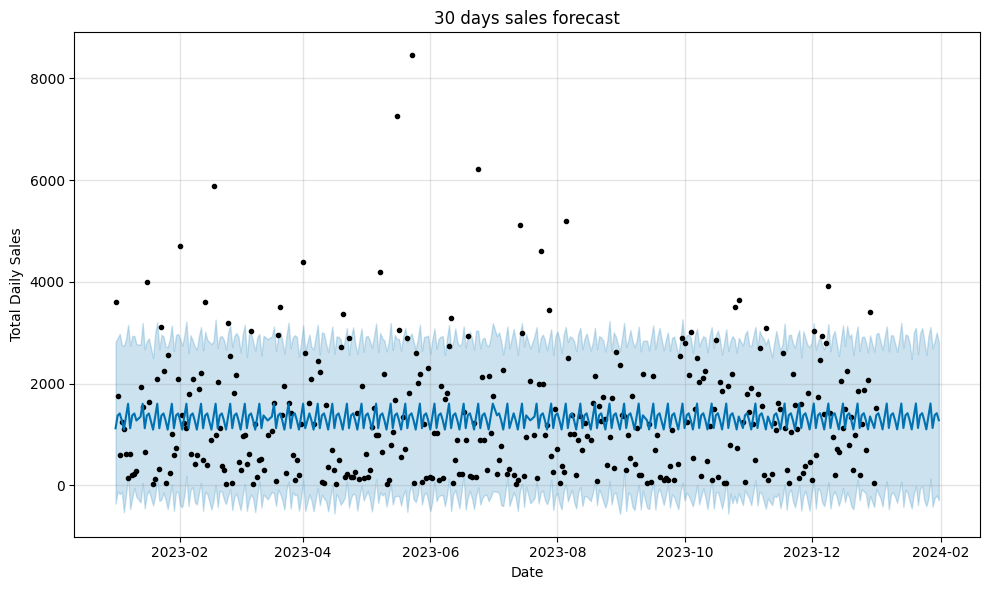

In [ ]:
model.plot(forecast)
plt.title("30 days sales forecast")
plt.xlabel("Date")
plt.ylabel("Total Daily Sales")
plt.tight_layout()
plt.show()

In [ ]:
print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(10))

            ds         yhat  yhat_lower   yhat_upper
365 2024-01-22  1380.180187  -60.843802  2985.986790
366 2024-01-23  1419.869575   -9.333696  3094.491046
367 2024-01-24  1281.118222 -297.321938  2839.716284
368 2024-01-25  1101.191225 -405.616974  2562.100935
369 2024-01-26  1356.421905 -261.556603  2933.408968
370 2024-01-27  1610.623558  136.031254  3112.485447
371 2024-01-28  1128.745005 -418.981418  2695.271728
372 2024-01-29  1380.274601 -245.943267  2836.398040
373 2024-01-30  1419.963989 -196.492856  3007.147437
374 2024-01-31  1281.212636 -292.207302  2816.725835
